# Exp8

## wanderer1_2agents
- 2 agents and 1 goal landmark
- the other rules are almost the same as Exp7;
    - except that the feature of the agents contains the other agnet's position.
        - i.e., the agent knows other agents' position (without using the energy).

the game is slightly complicated. 
- the simple solution to get reward is using their energy to get a wider viewable range,
    - which is the same solution of the 1-agent case.
- on the other hand, because the agent knows the opponent's position,
    - the agent can get reward without using the energy by following the oppnent,
    - if the oppnent knows the goal position (using its energy).
- but if each agent follows the oppnent without using the energy,
    - no agnet knows the goal so that no agent get good reward.
- **in summary, the agents need to balance between using the energy and the following.**
    
    
### In the following, I made experiments with different parameter set.
A parameter of "PENALTY_WEIGHT" controls heaviness of the penalty   
for the consumption of the energy. The results are described as follow.

### general results
In the most cases, the trained agents first move to the opponent.  
While moving, they also use the energy to get a wider visible range.   
This seems the optimized behavior for this game, becuase
- if the oppnent knows the goal, approaching to the opponent means reaching to the goal.
- even if the oppnent doesn't know, there is no demerit for the agent (in the view of expected rewards).
    - in that case, the agent uses more energy to find the goal position.

### wanderer1_2agents-1
no penalty for using the energy (PENALTY_WEIGHT = 0)
#### results
- the agent uses the energy with almost no limit, which is expected.
    - the reward of -50 means using the energy at every step.

### wanderer1_2agents-2
modest penalty (PENALTY_WEIGHT = 0.01)
#### results
- the model with the same parameter set is trained with different seeds (three times). 
    - in the three cases, the energy consumption behaviors are slightly different.
    - in one case, both agents' behavior converge to the same (the optimized behavior).
    - in other cases, agent0 tends to follow agent1using more energy than that of the optimzied behavior.
- the agents seem not to change the behavior after the local optimization,
    - probably because the reward of the change is small, 
        - which does not drive them to the global optimization.
    - **it looks that they are lazy :)**

### wanderer1_2agents-3
large penalty (PENALTY_WEIGHT = 0.015)
#### results
- the same model is played with different seeds (three times).  
    - all the three cases converge to almost the same resutls.
- both agents' behavior also converge to the same behavior.
    - this is probably because haeviness of the penalty dirves the agnets to optimize behavior.

### wanderer1_2agents-4
small penalty (PENALTY_WEIGHT = 0.005)
#### results
- almost the same as 2agents-2.
- this is consistent with my hypothesis of 2agents_2:
    - the low penaly doesn't encourage the agents to change.

## summary
When the penalty is small, the agents converge to different cases (for different seeds).  
In some case, one agent tends to behave like a **follower**: it tends to follow the opponent  
and not to use the  energy. **The followed agent loses reward but seems not to change  
its behavior, probably because the reward of the change from the local optimization is small.**
    
Acutually when the penalty is large, the agents' behavior converges to one optimized one;  
the agents seek for the best behavior, which is encouraged by the large penalty.

### comment
It's interesting that we human see some story for agents' behavior:
- the followed agent looks lazy to change itself
- the follower is cunning (it just follow and doesn't use the energy).

Of course the agents' behaviors are learned simply based on rewards;   
they don't have emotion.  
Our behavior might be also like this. We just behave based on the reward    
but we see a story and emotion in such a behavior.


# In the following, the detailed results of the experiments are shown.

In [1]:
%matplotlib inline
import glob
import utils_note
plt.rcParams["font.size"] = 12

colors = ['#d62728', '#2ca02c', '#1f77b4', '#ff7f0e']
    
def get_all_exp_curves(pdir):
    curve_dirs = [osp.join(d, 'learning_curves') for d in glob.glob(pdir+'/*')]
    return sorted(curve_dirs)

def plot_curves(ax, curve_dir, y_colns_template=None):
    each_exp_dir = curve_dir.split('/')[-2]
    df_r =  pd.read_csv(osp.join(curve_dir, 'agents_rewards.csv'))
    df_m = pd.read_csv(osp.join(curve_dir, 'agents_energy.csv'))
    _df = pd.merge(df_r, df_m, on=['episode', 'step']).drop(['step'], axis=1)
    
    if y_colns_template is not None:
        agents = set([c.split('_')[0] for c in _df.columns if c.startswith('agent')])
        for i_agent, agent in enumerate(sorted(list(agents))):
            kwargs = {}
            for i, y_coln in  enumerate(y_colns_template):
                    linestyles = ['-', '--', '-.', ':']
                    y_coln = '%s_%s' % (agent, y_coln)
                    kwargs['linestyle'] = linestyles[i % len(linestyles)]
                    kwargs['color'] = colors[i_agent]
                    _df.plot(x='episode', y=y_coln, ax=ax, title=each_exp_dir, **kwargs)
#                     kwargs['color'] = ax.get_lines()[-1].get_color()
    else:
        _df.plot(x='episode', ax=ax, title=each_exp_dir, **kwargs)
    ax.set_ylim([-100, 1])

def plot_training(each_exp_dir, y_columns):
    curve_dir = osp.join(each_exp_dir, 'learning_curves')
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    plot_curves(ax, curve_dir, y_columns)
    
def plot_energy(fn_video):
    fn_csvs =\
        glob.glob(fn_video.replace('.mp4', '_states_agent*.csv'))
    dfs = []
    for fn_csv in sorted(fn_csvs):
        dfs.append(pd.read_csv(fn_csv))

    fig, ax = plt.subplots(1, 1, figsize=(24, 4))
    legends = []
    for i, df_agent in enumerate(dfs):
        df_agent.plot(y='energy', ax=ax, color=colors[i])
        legends.append('agent%d energy' % i)
    ax.legend(legends)

    # plot end-episode line
    df_ = dfs[0]
    end_epi = 0
    for epi in sorted(df_['episode'].unique()):
        end_epi +=  df_.loc[df_['episode'] == epi, 'step'].max() + 1
        ax.axvline(end_epi, color='orange', ls='--')

# 1. Learning curve (episode vs rewards) for all parameter set
The consumption of the energy is also plotted.  
As the agent uses the enery, the energy decreases.  
When the agent says "A", the agent's energy decreases by 1.  
There are 50 steps in the episode so that the max consumption value is -50.  

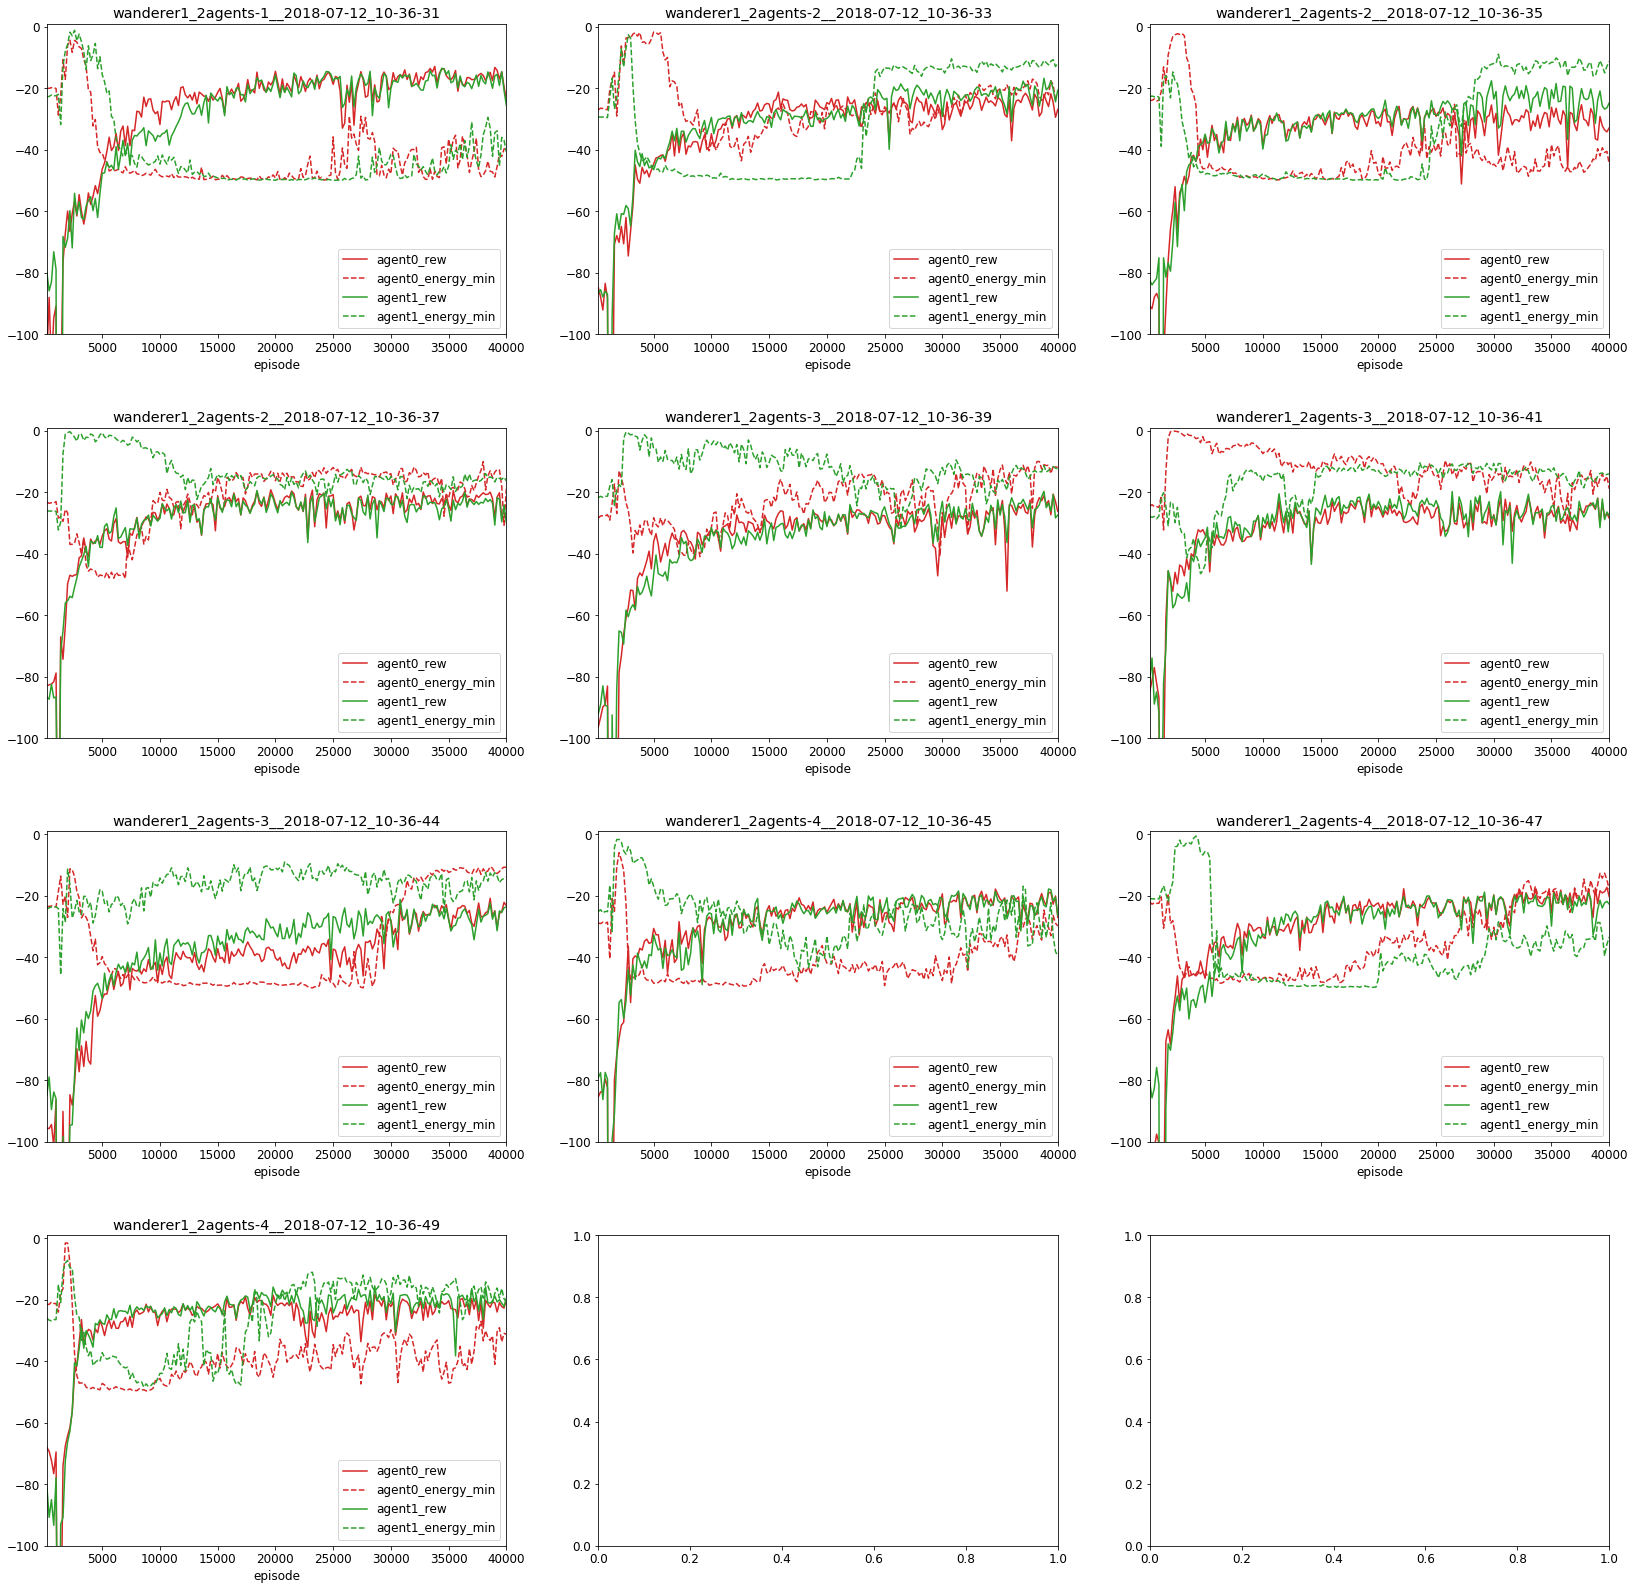

In [2]:
exp_dir = '../exp_results/exp8_180712'
y_columns = ['rew', 'energy_min']
fig, axes = plt.subplots(4, 3, figsize=(28, 28))
plt.subplots_adjust(hspace=0.3)
axes = axes.flatten()

curve_dirs = get_all_exp_curves(exp_dir)
for i, curve_dir in enumerate(curve_dirs):
    ax = axes[i]
    plot_curves(ax, curve_dir, y_columns)


In [3]:
y_columns = ['rew', 'energy_min']

def show_results(exp_dir, each_exp_dir, epis):
    # training plot
    each_exp_dir = osp.join(exp_dir, each_exp_dir)
    plot_training(each_exp_dir, y_columns)
    plt.show()

    fn_video_template = 'video-{}.mp4'
    for epi in epis:
        fn_video = fn_video_template.format(epi)
        display(utils_note.play_linked_video(each_exp_dir, fn_video))
        video_path = osp.join(each_exp_dir, 'videos', fn_video)
        plot_energy(video_path)
        plt.show()
    print('~o**' * 20)

# 2. Agents' behvior of the trained model
The content of each experiment contains
1. learning cuve (training log)
2. video of the trained agents' behavior
3. the corresponding log of the energy consumption 

The learning curve is the same as that of Section1.  
In the video of #2, the agents represent large colorful circles and the goal is a black point.  
The tranparent circle around the agent represents the visible range,   
which increases as the agent uses its energy.   
Here the video contains 5 episodes.  

The figure of #3 shows the corresponding log of the energy consumption  
of #2 video. The line color corresponds to the agent color of #2 video.  
There are 50 stesp in each episode so that the energy is reset at 0 (default value)   
every 50 steps. 


oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer1_2agents-1__2018-07-12_10-36-31"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



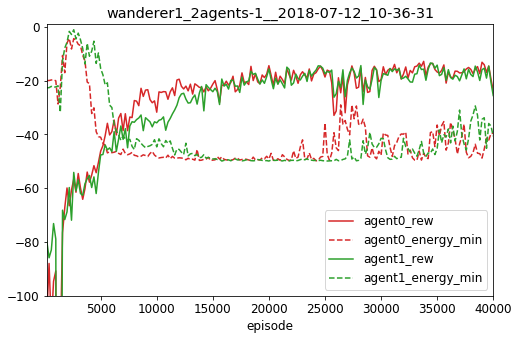

./videos/wanderer1_2agents-1__2018-07-12_10-36-31/videos/video-40000.mp4


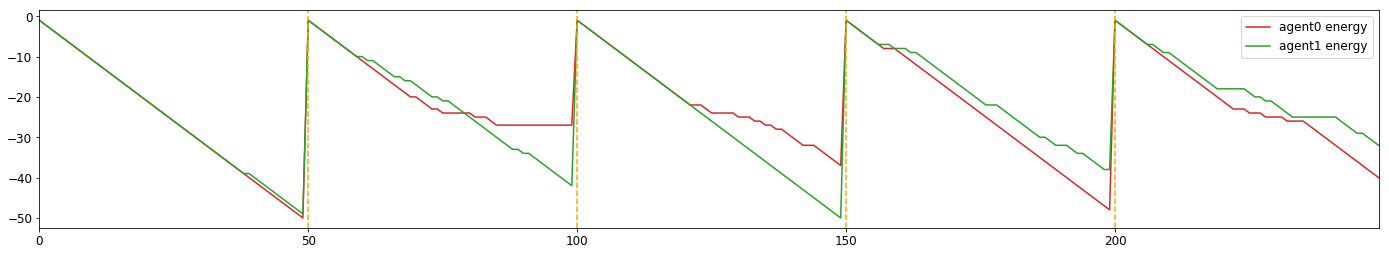

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**

oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer1_2agents-2__2018-07-12_10-36-35"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



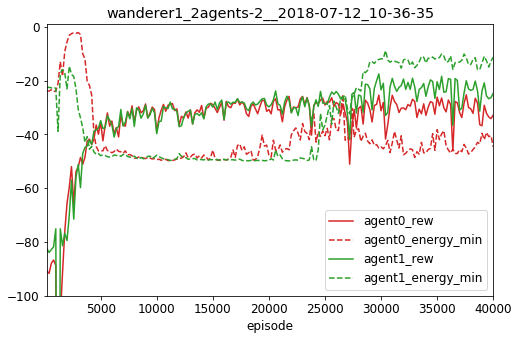

./videos/wanderer1_2agents-2__2018-07-12_10-36-35/videos/video-40000.mp4


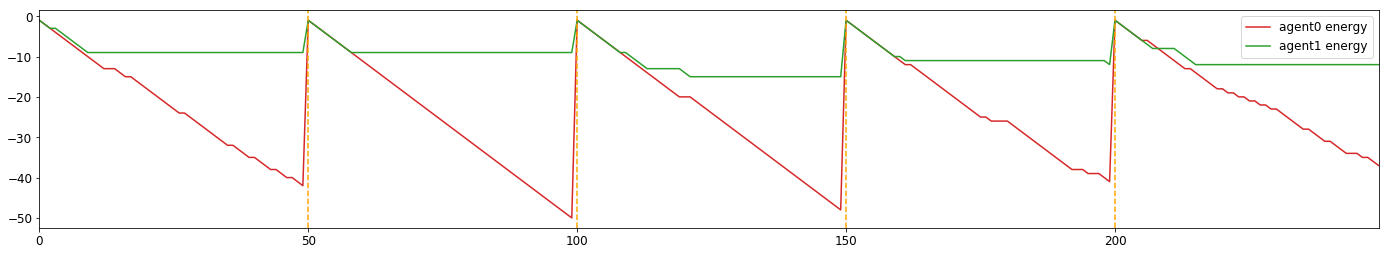

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**

oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer1_2agents-3__2018-07-12_10-36-41"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



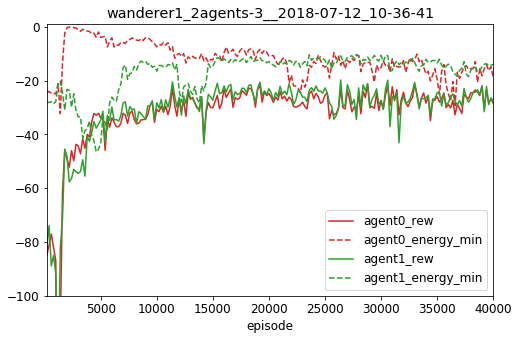

./videos/wanderer1_2agents-3__2018-07-12_10-36-41/videos/video-40000.mp4


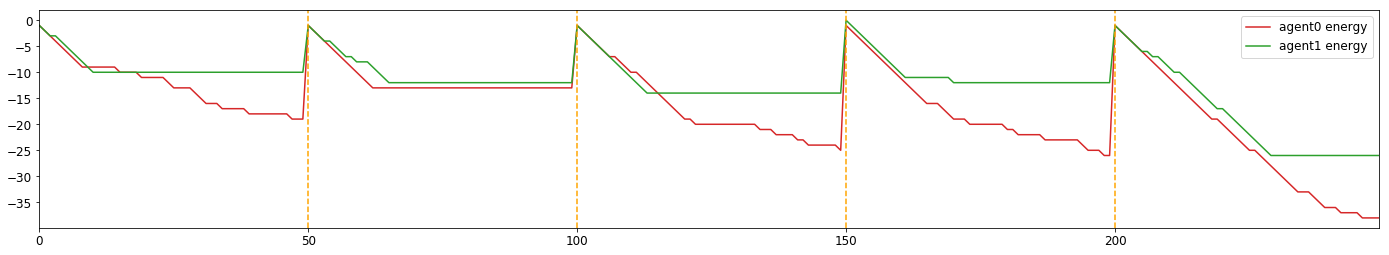

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**

oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer1_2agents-4__2018-07-12_10-36-49"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



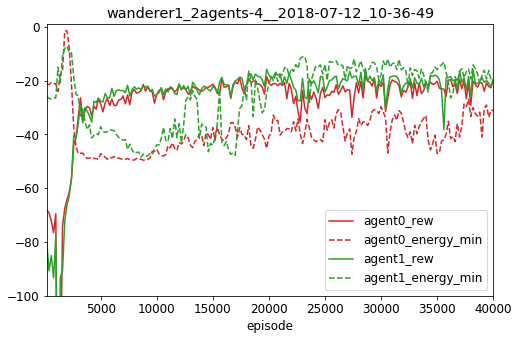

./videos/wanderer1_2agents-4__2018-07-12_10-36-49/videos/video-40000.mp4


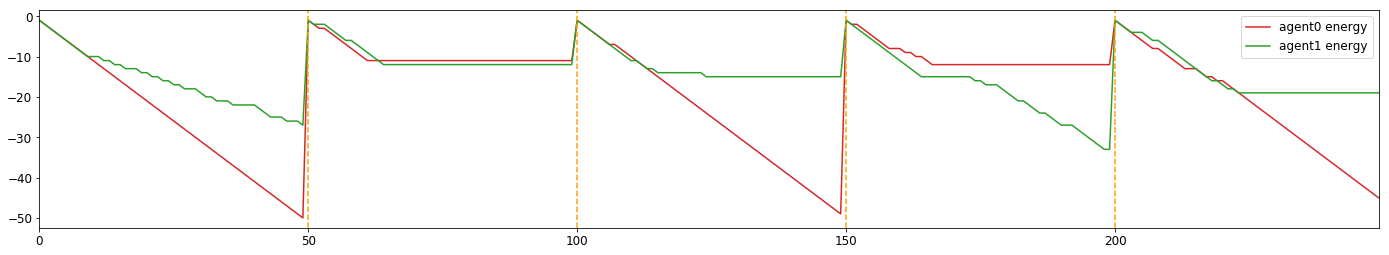

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**


In [4]:
exp_dir = '../exp_results/exp8_180712/'
each_dirs =\
['wanderer1_2agents-1__2018-07-12_10-36-31',
 'wanderer1_2agents-2__2018-07-12_10-36-35',
 'wanderer1_2agents-3__2018-07-12_10-36-41',
 'wanderer1_2agents-4__2018-07-12_10-36-49']
epis = [40000]

for each_exp_dir in each_dirs:
    print('\n' + 'o'*60 + '\nExperiment of "%s"\n' %  each_exp_dir + 'o'*60 + '\n')
    show_results(exp_dir, each_exp_dir, epis)